In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
pip install keras.utils

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

In [2]:
print("darsh")

darsh


In [3]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [4]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from keras.callbacks import EarlyStopping

In [7]:
base_dir ='.'
data_dir=os.path.join(base_dir,'train')
files=os.listdir(data_dir)

In [8]:
l1=pd.read_csv('labels.csv')
l1.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
fd=pd.DataFrame({'id':list(map(lambda x:x.replace('.jpg',''),files))})
fd.head()

,id
0,000bec180eb18c7604dcecc8fe0dba07
1,001513dfcb2ffafc82cccf4d8bbaba97
2,001cdf01b096e06d78e9e5112d419397
3,00214f311d5d2247d5dfe4fe24b2303d
4,0021f9ceb3235effd7fcde7f7538ed62


In [10]:
label_info = pd.merge(left=fd,right=l1)
label_info.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
img = plt.imread(os.path.join(data_dir,files[1]))

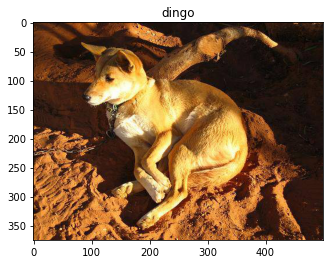

In [12]:
plt.imshow(img)
plt.title(label_info.iloc[1]['breed'])
plt.show()

In [13]:
num_classes = len(label_info.breed.unique())
num_classes

120

In [14]:
le=LabelEncoder()
breed = le.fit_transform(label_info.breed)
Y = np_utils.to_categorical(breed,num_classes=num_classes)

In [15]:
Y.shape

(10222, 120)

In [16]:
input_dim =(170,170)
X=np.zeros((Y.shape[0],*input_dim,3))
for i,img in enumerate(files):
	image = load_img(os.path.join(data_dir,img),target_size=input_dim)
	image = img_to_array(image)
	image = image.reshape((1,*image.shape))
	image = preprocess_input(image)
	X[i] = image

In [17]:
X.shape

(10222, 170, 170, 3)

In [18]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0 , patience =2 , verbose=0 , mode='auto')

In [19]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D ,Flatten ,Dropout
vgg_model  = VGG19(weights='imagenet',include_top=False)
x=vgg_model.output
x=GlobalAveragePooling2D()(x)
x=Dropout(0.2)(x)
out=Dense(120,activation='softmax')(x)
model = Model(inputs=vgg_model.input,outputs=out)

for layer in vgg_model.layers:
	layer.trainable = False

from keras.optimizers import Adam
opt=Adam()

model.compile(optimizer=opt , loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [19]:
history_last_layer = model.fit(X,Y,batch_size=150,epochs=20,validation_split=0.35,verbose=2,callbacks=[earlystop])
model.save('modellastlayer.h5')

Epoch 1/20
45/45 - 554s - loss: 20.8823 - accuracy: 0.0318 - val_loss: 10.3170 - val_accuracy: 0.1040
Epoch 2/20
45/45 - 532s - loss: 10.5178 - accuracy: 0.1481 - val_loss: 6.1031 - val_accuracy: 0.2753
Epoch 3/20
45/45 - 532s - loss: 7.0672 - accuracy: 0.2787 - val_loss: 4.7657 - val_accuracy: 0.3835
Epoch 4/20
45/45 - 530s - loss: 5.3319 - accuracy: 0.3641 - val_loss: 4.1579 - val_accuracy: 0.4466
Epoch 5/20
45/45 - 528s - loss: 4.2243 - accuracy: 0.4536 - val_loss: 3.8881 - val_accuracy: 0.4676
Epoch 6/20
45/45 - 530s - loss: 3.7025 - accuracy: 0.4839 - val_loss: 3.6888 - val_accuracy: 0.4880
Epoch 7/20
45/45 - 528s - loss: 3.0884 - accuracy: 0.5384 - val_loss: 3.4713 - val_accuracy: 0.5148
Epoch 8/20
45/45 - 520s - loss: 2.7284 - accuracy: 0.5686 - val_loss: 3.3080 - val_accuracy: 0.5240
Epoch 9/20
45/45 - 516s - loss: 2.3288 - accuracy: 0.6088 - val_loss: 3.2776 - val_accuracy: 0.5260
Epoch 10/20
45/45 - 516s - loss: 2.0388 - accuracy: 0.6398 - val_loss: 3.2209 - val_accuracy: 0.5

In [20]:
print("darsh")

darsh


In [21]:
history_last_layer.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
print("18DIT045")

18DIT045


In [34]:
val_acc = history_last_layer.history.get('val_accuracy')

In [32]:
acc = history_last_layer.history.get('accuracy')

In [35]:
print(val_acc)

[0.10396869480609894, 0.2752934694290161, 0.38345444202423096, 0.4466182291507721, 0.4675796627998352, 0.4879821240901947, 0.5148127675056458, 0.5240357518196106, 0.5259921550750732, 0.5354946851730347, 0.5438792705535889, 0.5477920770645142, 0.5469536185264587, 0.550866425037384, 0.5542202591896057, 0.5525433421134949, 0.5533818006515503, 0.5586919784545898, 0.5687534809112549, 0.5631637573242188]


In [36]:
print(acc)

[0.03175797685980797, 0.14810355007648468, 0.2787477374076843, 0.36408790946006775, 0.4536423981189728, 0.4838952422142029, 0.53838050365448, 0.5686333775520325, 0.6088199615478516, 0.6398254036903381, 0.6640577912330627, 0.6827212572097778, 0.6997290849685669, 0.7140277028083801, 0.7259181141853333, 0.7641481161117554, 0.7697170376777649, 0.7751354575157166, 0.8038831949234009, 0.8026791214942932]


In [37]:
overfit_info =  pd.DataFrame({'acc':acc , 'val_acc':val_acc})

<AxesSubplot:>

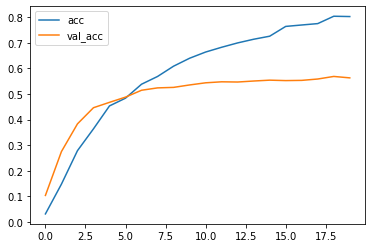

In [38]:
overfit_info.plot.line()

In [41]:
image = load_img('x.jpg',target_size=input_dim)   # This is random image from google and it is of blutick dog
image = img_to_array(image)
image = image.reshape((1,*image.shape))
image = preprocess_input(image)

In [43]:
result=model.predict(image)

In [44]:
s= np.argsort(result)[0][-5:]
s

array([113,  42,  14,   5,  15], dtype=int64)

In [47]:
d1=le.inverse_transform(s)
d1

array(['walker_hound', 'entlebucher', 'bloodhound', 'appenzeller',
       'bluetick'], dtype=object)

In [52]:
d2=[ele for ele in reversed(d1)] 
k=1
for x in d2:
    print("Your dog on prediction number ",k," is:",x)
    k+=1

Your dog on prediction number  1  is: bluetick
Your dog on prediction number  2  is: appenzeller
Your dog on prediction number  3  is: bloodhound
Your dog on prediction number  4  is: entlebucher
Your dog on prediction number  5  is: walker_hound


In [67]:
image1 = load_img('z.jpg',target_size=input_dim)   # This is random image from google and it is of labrador dog
image1 = img_to_array(image1)
image1 = image.reshape((1,*image1.shape))
image1 = preprocess_input(image1)

In [68]:
result1=model.predict(image1)

In [69]:
s1= np.argsort(result1)[0][-5:]
s1

array([ 41,   8,  47, 113,  15], dtype=int64)

In [70]:
d3=le.inverse_transform(s1)
d3

array(['english_springer', 'basset', 'german_short-haired_pointer',
       'walker_hound', 'bluetick'], dtype=object)

In [71]:
d4=[ele for ele in reversed(d3)] 
k=1
for x in d4:
    print("Your dog on prediction number ",k," is:",x)
    k+=1

Your dog on prediction number  1  is: bluetick
Your dog on prediction number  2  is: walker_hound
Your dog on prediction number  3  is: german_short-haired_pointer
Your dog on prediction number  4  is: basset
Your dog on prediction number  5  is: english_springer


In [80]:
image2 = load_img('dhole.jpg',target_size=input_dim)   # This is random image from google and it is of dhole dog
image2 = img_to_array(image2)
image2 = image.reshape((1,*image2.shape))
image2 = preprocess_input(image2)

In [81]:
result2=model.predict(image2)
s2= np.argsort(result2)[0][-5:]
s2

array([114,  39,  47, 113,  15], dtype=int64)

In [82]:
d5=le.inverse_transform(s2)
d6=[ele for ele in reversed(d5)] 
k=1
for x in d5:
    print("Your dog on prediction number ",k," is:",x)
    k+=1

Your dog on prediction number  1  is: weimaraner
Your dog on prediction number  2  is: english_foxhound
Your dog on prediction number  3  is: german_short-haired_pointer
Your dog on prediction number  4  is: walker_hound
Your dog on prediction number  5  is: bluetick


# Adding few more layer for training

In [23]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D ,Flatten ,Dropout
vgg_model  = VGG19(weights='imagenet',include_top=False)
x=vgg_model.output
x=GlobalAveragePooling2D()(x)
x=Dropout(0.25)(x)
out=Dense(120,activation='softmax')(x)
model_few_layers= Model(inputs=vgg_model.input,outputs=out)

for layer in vgg_model.layers[:-2]:
	layer.trainable = False
    

for layer in vgg_model.layers[-2:]:
	layer.trainable = True
    
from keras.optimizers import Adam
opt=Adam()

model_few_layers.compile(optimizer=opt , loss='categorical_crossentropy',metrics=['accuracy'])
model_few_layers.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [24]:
history_last2_layer = model_few_layers.fit(X,Y,batch_size=140,epochs=20,validation_split=0.30,verbose=2,callbacks=[earlystop])
model_few_layers.save('modelfewlayer.h5')

Epoch 1/20
52/52 - 560s - loss: 6.9804 - accuracy: 0.0526 - val_loss: 3.9565 - val_accuracy: 0.1545
Epoch 2/20
52/52 - 545s - loss: 3.4968 - accuracy: 0.2151 - val_loss: 2.9219 - val_accuracy: 0.3208
Epoch 3/20
52/52 - 542s - loss: 2.4999 - accuracy: 0.3775 - val_loss: 2.3691 - val_accuracy: 0.4063
Epoch 4/20
52/52 - 542s - loss: 1.9367 - accuracy: 0.4874 - val_loss: 2.1716 - val_accuracy: 0.4346
Epoch 5/20
52/52 - 544s - loss: 1.4719 - accuracy: 0.5912 - val_loss: 2.1257 - val_accuracy: 0.4486
Epoch 6/20
52/52 - 547s - loss: 1.2301 - accuracy: 0.6453 - val_loss: 2.0337 - val_accuracy: 0.4695
Epoch 7/20
52/52 - 546s - loss: 0.9320 - accuracy: 0.7219 - val_loss: 2.0410 - val_accuracy: 0.4819
Epoch 8/20
52/52 - 545s - loss: 0.7863 - accuracy: 0.7632 - val_loss: 2.0789 - val_accuracy: 0.4865


In [22]:
from keras.models import load_model

In [25]:
print("18dit045")

18dit045


In [28]:
history_last2_layer.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
val_acc = history_last2_layer.history.get('val_accuracy')

In [33]:
acc = history_last2_layer.history.get('accuracy')

In [36]:
overfit_info =  pd.DataFrame({'acc':acc , 'val_acc':val_acc})

<AxesSubplot:>

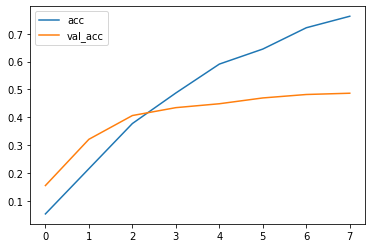

In [37]:
overfit_info.plot.line()

In [44]:
from keras.models import load_model
from keras.preprocessing .image import ImageDataGenerator

In [45]:
def validate(X,Y):
    for x1 in ['modellastlayer.h5','modelfewlayer.h5','modellastlayer.h5']:
        model = load_model(x1)
        pred=model.predict(X)
        top3=np.argsort(pred)[:,-3:]
        actual=np.argmax(Y,axis=1)
        res=top3-actual.reshape(-1,1)
        ana=np.product(res,axis=1)
        print(x1,np.sum(ana==0)/ana.shape[0])

In [46]:
validate(X,Y)

modellastlayer.h5 0.8791234983218531
modelfewlayer.h5 0.8431294253124035
modellastlayer.h5 0.8947389929402049


In [38]:
image1 = load_img('z.jpg',target_size=input_dim)   # This is random image from google and it is of labrador dog
image1 = img_to_array(image1)
image1 = image.reshape((1,*image1.shape))
image1 = preprocess_input(image1)

In [40]:
result=model_few_layers.predict(image)

In [41]:
s= np.argsort(result)[0][-5:]
s

array([ 8, 47, 95, 63,  4], dtype=int64)

In [42]:
le.inverse_transform(s)

array(['basset', 'german_short-haired_pointer', 'schipperke', 'kelpie',
       'american_staffordshire_terrier'], dtype=object)

# Image augmentation

In [18]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [19]:
datagen = ImageDataGenerator(
	featurewise_center=True,
	featurewise_std_normalization=True,
	rotation_range=20,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True)

In [20]:
datagen.fit(X)

In [26]:
import itertools

In [21]:
model = load_model('modellastlayer.h5')

In [22]:
p1 = datagen.flow(X,Y,batch_size=140)
                                                 

In [31]:
type(X)

numpy.ndarray

In [44]:
'''X2=X
input_dim =(170,170)
X=np.zeros((Y.shape[0],*input_dim,3))
for i,img in enumerate(p1):
	image = load_img(os.path.join(data_dir,img),target_size=input_dim)
	image = img_to_array(image)
	image = image.reshape((1,*image.shape))
	image = preprocess_input(image)
	X[i] = image'''

74

In [45]:
history_aug_images=model.fit(p1,steps_per_epoch=len(p1)/30,epochs=10,verbose=2)
#history_aug_images=model.fit(p1.repeat(),steps_per_epoch=len(X)/100,epochs=10,verbose=2)

Epoch 1/10
2/2 - 22s - loss: 3.8195 - accuracy: 0.3500
Epoch 2/10
2/2 - 21s - loss: 3.7864 - accuracy: 0.3405
Epoch 3/10
2/2 - 21s - loss: 3.7800 - accuracy: 0.3595
Epoch 4/10
2/2 - 21s - loss: 3.7863 - accuracy: 0.3476
Epoch 5/10
2/2 - 21s - loss: 3.7764 - accuracy: 0.3357
Epoch 6/10
2/2 - 21s - loss: 3.7921 - accuracy: 0.3262
Epoch 7/10
2/2 - 22s - loss: 3.7714 - accuracy: 0.3524
Epoch 8/10
2/2 - 21s - loss: 3.8338 - accuracy: 0.3357
Epoch 9/10
2/2 - 21s - loss: 3.7607 - accuracy: 0.3476
Epoch 10/10
2/2 - 21s - loss: 3.7817 - accuracy: 0.3190


In [46]:
history_aug_images.history.keys()

dict_keys(['loss', 'accuracy'])

In [47]:
model.save('img_aug5.h5')

In [48]:
image1 = load_img('z.jpg',target_size=input_dim)   # This is random image from google and it is of labrador dog
image1 = img_to_array(image1)
image1 = image.reshape((1,*image1.shape))
image1 = preprocess_input(image1)

In [49]:
res = model.predict(image)

In [50]:
s=np.argsort(res)[0][-5:]
s

array([ 6, 51, 19,  7, 28], dtype=int64)

In [51]:
le.inverse_transform(s)

array(['australian_terrier', 'great_dane', 'boston_bull', 'basenji',
       'chesapeake_bay_retriever'], dtype=object)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
trainX,testX,trainY,testY=train_test_split(X,Y)

In [24]:
trainY.shape

(7666, 120)

In [25]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D ,Flatten ,Dropout
vgg_model  = VGG19(weights='imagenet',include_top=False)
x=vgg_model.output
x=GlobalAveragePooling2D()(x)
x=Dropout(0.2)(x)
out=Dense(120,activation='softmax')(x)
model_few1_layers= Model(inputs=vgg_model.input,outputs=out)
for layer in vgg_model.layers[:-1]:
	layer.trainable = False

for layer in vgg_model.layers[-1:]:
	layer.trainable = True


In [26]:
from keras.optimizers import Adam
opt=Adam()

In [27]:
model_few1_layers.compile(optimizer=opt , loss='categorical_crossentropy',metrics=['accuracy'])
model_few1_layers.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [28]:
datagen.fit(trainX)


In [ ]:
history_aug_images = model_few1_layers.fit(datagen.flow(trainX,trainY,batch_size=140),steps_per_epoch=len(X)/20,epochs=10,verbose=2)
model_few1_layers.save('model.aug1_layer.h5')

Epoch 1/10


In [18]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D ,Flatten ,Dropout
vgg_model  = VGG19(weights='imagenet',include_top=False)
x=vgg_model.output
x=GlobalAveragePooling2D()(x)
x=Dropout(0.25)(x)
out=Dense(120,activation='softmax')(x)
model_few2_layers= Model(inputs=vgg_model.input,outputs=out)

for layer in vgg_model.layers[:-2]:
	layer.trainable = False
    

for layer in vgg_model.layers[-2:]:
	layer.trainable = True
    
from keras.optimizers import Adam
opt=Adam()

model_few2_layers.compile(optimizer=opt , loss='categorical_crossentropy',metrics=['accuracy'])
model_few2_layers.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [20]:
history_last23_layer = model_few2_layers.fit(X,Y,batch_size=140,epochs=15,validation_split=0.30,verbose=2)
model_few2_layers.save('modelfew2layer.h5')

Epoch 1/15
52/52 - 567s - loss: 6.5912 - accuracy: 0.0654 - val_loss: 3.8529 - val_accuracy: 0.1594
Epoch 2/15
52/52 - 557s - loss: 3.3555 - accuracy: 0.2326 - val_loss: 2.8611 - val_accuracy: 0.3091
Epoch 3/15
52/52 - 555s - loss: 2.4154 - accuracy: 0.3954 - val_loss: 2.3639 - val_accuracy: 0.3978
Epoch 4/15
52/52 - 556s - loss: 1.8422 - accuracy: 0.4981 - val_loss: 2.1869 - val_accuracy: 0.4336
Epoch 5/15
52/52 - 556s - loss: 1.4220 - accuracy: 0.5979 - val_loss: 2.0260 - val_accuracy: 0.4806
Epoch 6/15
52/52 - 555s - loss: 1.1047 - accuracy: 0.6783 - val_loss: 2.0201 - val_accuracy: 0.4858
Epoch 7/15
52/52 - 554s - loss: 0.8663 - accuracy: 0.7426 - val_loss: 2.0161 - val_accuracy: 0.4985
Epoch 8/15
52/52 - 555s - loss: 0.6685 - accuracy: 0.8066 - val_loss: 2.0633 - val_accuracy: 0.4842
Epoch 9/15
52/52 - 556s - loss: 0.5451 - accuracy: 0.8309 - val_loss: 2.1102 - val_accuracy: 0.5015
Epoch 10/15
52/52 - 556s - loss: 0.4250 - accuracy: 0.8668 - val_loss: 2.1647 - val_accuracy: 0.4914

In [23]:
from keras.models import load_model

In [21]:
def validate(X,Y):
    for x1 in ['modellastlayer.h5','modelfewlayer.h5','modelfew2layer.h5']:
        model = load_model(x1)
        pred=model.predict(X)
        top3=np.argsort(pred)[:,-3:]
        actual=np.argmax(Y,axis=1)
        res=top3-actual.reshape(-1,1)
        ana=np.product(res,axis=1)
        print(x1,np.sum(ana==0)/ana.shape[0])

In [24]:
validate(X,Y)

modellastlayer.h5 0.9047153198982587
modelfewlayer.h5 0.9102915280766973
modelfew2layer.h5 0.9187047544511837


In [25]:
image1 = load_img('z.jpg',target_size=input_dim)   # This is random image from google and it is of labrador dog
image1 = img_to_array(image1)
image1 = image.reshape((1,*image1.shape))
image1 = preprocess_input(image1)

In [27]:
model=load_model('modelfew2layer.h5')

In [28]:
res = model.predict(image)

In [29]:
s=np.argsort(res)[0][-5:]
s

array([80, 73,  8,  3, 67], dtype=int64)

In [31]:
d3=le.inverse_transform(s)
d3

array(['norwegian_elkhound', 'maltese_dog', 'basset', 'airedale',
       'labrador_retriever'], dtype=object)

In [32]:
d4=[ele for ele in reversed(d3)] 
k=1
for x in d4:
    print("Your dog on prediction number ",k," is:",x)
    k+=1

Your dog on prediction number  1  is: labrador_retriever
Your dog on prediction number  2  is: airedale
Your dog on prediction number  3  is: basset
Your dog on prediction number  4  is: maltese_dog
Your dog on prediction number  5  is: norwegian_elkhound
